In [16]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
#Numerator - 분수에서 분자를 가리킴
#Denominator - 분수에서 분모를 가리킴
#데이터 양이 매우 많다는 것을 알 수 있음

In [21]:
data.isnull().sum()
#null값 존재

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [22]:
data = data.dropna()

In [23]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [24]:
print(data.shape)

(568411, 10)


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568411.0,2.842274e+05,1.640990e+05,1.0,1.421145e+05,2.842240e+05,4.263415e+05,5.684540e+05
HelpfulnessNumerator,568411.0,1.743874e+00,7.636781e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568411.0,2.227876e+00,8.288752e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568411.0,4.183309e+00,1.310368e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568411.0,1.296261e+09,4.803792e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


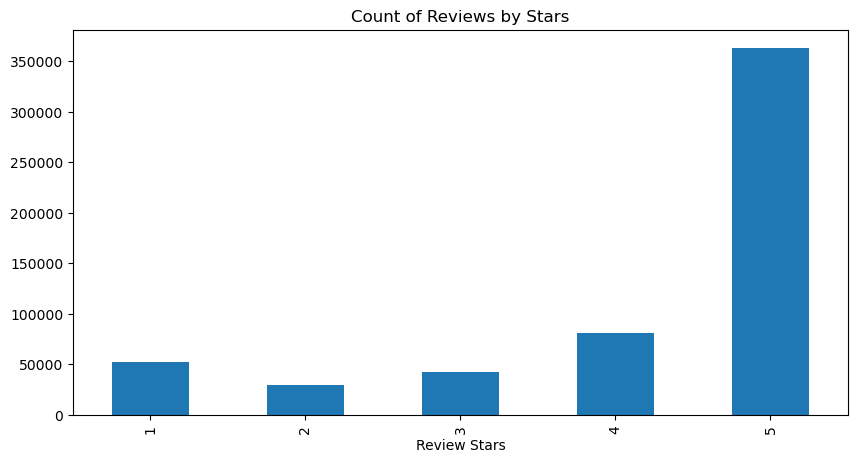

In [26]:
#점수별 리뷰 개수 확인하기
ax = data['Score'].value_counts().sort_index() \
    .plot(kind='bar',
         title='Count of Reviews by Stars',
         figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [69]:
#리뷰 점수별 개수 퍼센트로 표현하기
total = data["Score"].count()
percent_plot = pd.DataFrame({"Total":data["Score"].value_counts()})
percent_plot.reset_index(inplace = True)
percent_plot.rename(columns={"index":"Score"},inplace=True)
percent_plot["Percent"] = percent_plot["Total"].apply(lambda x: (x/total)*100)

<AxesSubplot:xlabel='Score', ylabel='Percent'>

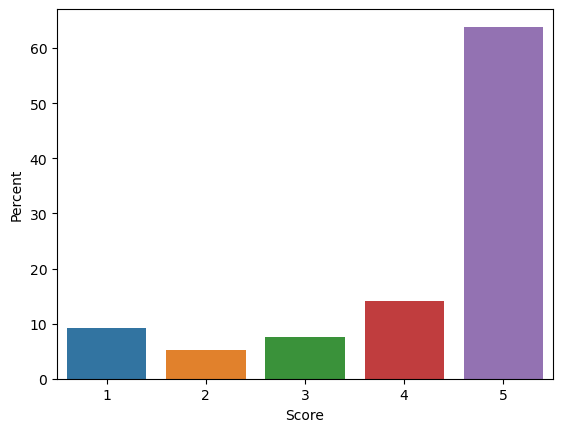

In [70]:
sns.barplot(x="Score", y="Percent", data=percent_plot)

In [41]:
#productid unique값 개수 확인
print(len(data['ProductId'].unique()))

74258


In [46]:
#ProductId별 리뷰 평균 구하기
productid_review = data.groupby('ProductId')['Score'].mean()
productid_review

ProductId
0006641040    4.351351
141278509X    5.000000
2734888454    3.500000
2841233731    5.000000
7310172001    4.751445
                ...   
B009UOFTUI    1.000000
B009UOFU20    1.000000
B009UUS05I    5.000000
B009WSNWC4    5.000000
B009WVB40S    5.000000
Name: Score, Length: 74258, dtype: float64

In [59]:
pt1 = data.pivot_table(index=['ProductId']
                      , columns=['Score']
                      , values=['UserId']
                      , aggfunc = 'count')
pt1.head(20)

UserId                         
Score           1     2     3     4      5
ProductId                                 
0006641040    2.0   NaN   3.0  10.0   22.0
141278509X    NaN   NaN   NaN   NaN    1.0
2734888454    NaN   1.0   NaN   NaN    1.0
2841233731    NaN   NaN   NaN   NaN    1.0
7310172001    2.0   2.0   6.0  17.0  146.0
7310172101    2.0   2.0   6.0  17.0  146.0
7800648702    NaN   NaN   1.0   NaN    1.0
9376674501    NaN   NaN   NaN   NaN    1.0
B00002N8SM   27.0   2.0   3.0   2.0    4.0
B00002NCJC    NaN   NaN   NaN   1.0    1.0
B00002Z754    NaN   NaN   NaN   NaN    2.0
B00004CI84    8.0   3.0   9.0  38.0  131.0
B00004CXX9   10.0   6.0  10.0  38.0  131.0
B00004RAMS    6.0   2.0   4.0   3.0   15.0
B00004RAMV    6.0   NaN   NaN   2.0    1.0
B00004RAMX    6.0   1.0   2.0   3.0   13.0
B00004RAMY   21.0  10.0   8.0  24.0  109.0
B00004RBDU   18.0   3.0   6.0  17.0   51.0
B00004RBDW    4.0   5.0   NaN   NaN   22.0
B00004RBDZ   13.0   4.0   5.0   7.0   30.0

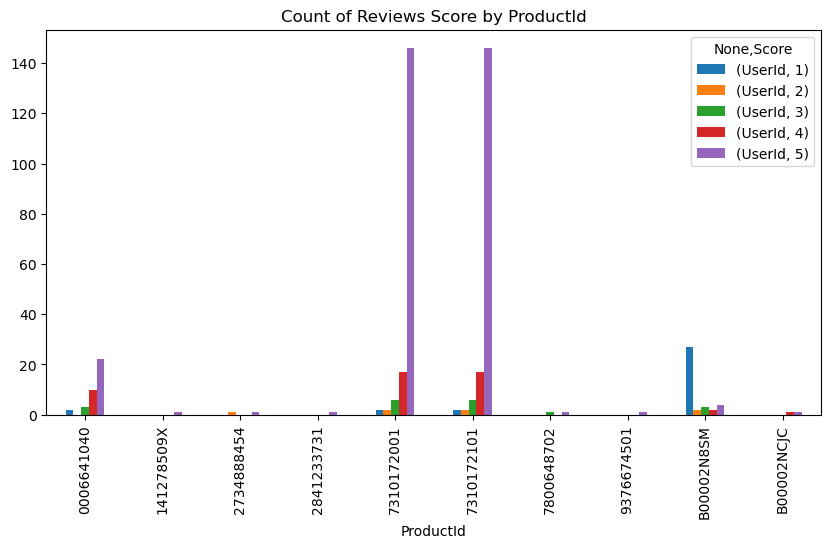

In [62]:
#점수별 리뷰 개수 확인하기
ax = pt1.head(10).sort_index() \
    .plot(kind='bar',
         title='Count of Reviews Score by ProductId',
         figsize=(10,5))
ax.set_xlabel('ProductId')
plt.show()

## WordCloud Clustering

In [74]:
data["word_count"] = data["Text"].apply(lambda x: len(str(x).split(" ")))
data[["Text","word_count"]].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


In [76]:
common_words = pd.Series(' '.join(data["Text"]).split()).value_counts()
common_words[:20]

the     1628022
I       1388024
and     1228619
a       1163101
to       992344
of       789642
is       714256
it       631240
for      519980
in       512386
this     488303
that     400460
my       364014
with     336238
have     335281
but      324902
are      310922
was      307851
not      285042
you      280381
dtype: int64

In [80]:
#위에서처럼 흔하게 쓰이지만 필요없는 단어들은 정제하는 절차 필요

In [81]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words("english"))


add_words = ["the","I","and","a","to","of","is","it","for","in","this","that","my","with",     
"have",     
"but",      
"are",      
"was",      
"not",      
"you"]

stop_words = stop_words.union(add_words)

In [25]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize

corpus = []

def clean_content(data):
    cleaned_content = []
    
    for sent in tqdm(data["Text"]):
        
        #Removing HTML comtent
        review_content = BeautifulSoup(sent).get_text()
        
        #Removing non-alphabetic charecters
        review_content = re.sub("[^a-zA-Z]"," ", review_content)
        
        #Tokenize the sentences
        words = word_tokenize(review_content.lower())
        
        #Removing the stop words
        sto_words_removed = [word for word in words if not word in stop_words]
        sto_words_removed = " ".join(sto_words_removed)
        corpus.append(sto_words_removed)
        cleaned_content.append(sto_words_removed)
        
    return (cleaned_content)

In [28]:
data["cleaned_text"] = clean_content(data)

100%|█████████████████████████████████| 568454/568454 [03:20<00:00, 2833.36it/s]


In [29]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [30]:
wordcloud = WordCloud(
                    background_color = "white",
                    stopwords = stop_words,
                    max_words = 100,
                    max_font_size = 50).generate(str(corpus))

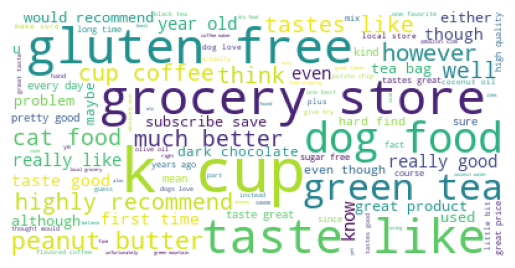

In [31]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#gluten-free
#grocery store
#green tea
#penut-butter
#highly recommend 등의 단어로 어떤 평가들이 많이 나왔는지 확인할 수 있다